# import

1. 현재 페이지에서 사용되는 전체 import 선언

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler, RobustScaler, PowerTransformer
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, Normalizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras.layers import Dense, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping


# 데이터 불러오기

1. feature_path에 추출할 데이터 경로 지정

In [127]:
# 데이터 전처리
extract_feature_original_path = r".\data\original_data\extract_faeture(original).csv"
df = pd.read_csv(extract_feature_original_path)
df

C:\Users\USER\AppData\Local\Temp\ipykernel_12076\2803317117.py:3: DtypeWarning: Columns (155,156,157,158,159,160,161,162,163,164,165,203,204,205,206,207,208,209,210,211,212,213) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(extract_feature_original_path)


,file_name,is_pe,DOS_HEADER/e_magic,DOS_HEADER/e_cblp,DOS_HEADER/e_cp,DOS_HEADER/e_crlc,DOS_HEADER/e_cparhdr,DOS_HEADER/e_minalloc,DOS_HEADER/e_maxalloc,DOS_HEADER/e_ss,...,byte_entropy_histogram_55,byte_entropy_histogram_56,byte_entropy_histogram_57,byte_entropy_histogram_58,byte_entropy_histogram_59,byte_entropy_histogram_60,byte_entropy_histogram_61,byte_entropy_histogram_62,byte_entropy_histogram_63,label
0,19253ef0d34202c4b633e85bbc9458be8444ae900f3e14...,True,0x5a4d,0x90,0x3,0x0,0x4,0x0,0xffff,0x0,...,33817,7203,4887,3189,5669,2300,1939,1660,1825,0
1,3ef7fdbc5b6acb889d73bf9b8d3badd752aa838c7b39dc...,True,0x5a4d,0x90,0x3,0x0,0x4,0x0,0xffff,0x0,...,0,0,0,0,0,0,0,0,0,1
2,cbdb408796576a4e9b550df067ad7074f4f81ece673d24...,True,0x5a4d,0x90,0x3,0x0,0x4,0x0,0xffff,0x0,...,33605,0,0,0,0,0,0,0,0,0
3,e53166d1cfbfd1afda2153eaeae3e0a12ecf2c4d1e1e03...,True,0x5a4d,0x50,0x2,0x0,0x4,0xf,0xffff,0x0,...,249421,0,0,0,0,0,0,0,0,0
4,00ab8f6c1c7d6a7c6549c6c2aa317cf0e9b73bc34d30aa...,False,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27541,55ada07d6d2b99f5517f5dfab431d0a0abd04bebd9e383...,True,0x5a4d,0x90,0x3,0x0,0x4,0x0,0xffff,0x0,...,6849,1963,1641,817,1850,561,474,447,439,0
27542,63f49a8ead04e04ab149084141f162027ee51af6e9bb49...,True,0x5a4d,0x90,0x3,0x0,0x4,0x0,0xffff,0x0,...,0,7147,4805,3172,5716,2341,1875,1771,1845,0
27543,559be60f6713866f0efae392bb315dbee5caa62398a445...,True,0x5a4d,0x90,0x3,0x0,0x4,0x0,0xffff,0x0,...,20979,126090,124540,124735,125069,124803,125439,125266,125530,1
27544,61b401f06250e85b4f4822c9c09f9ff6ba8303a5d4793b...,True,0x5a4d,0x90,0x3,0x0,0x4,0x0,0xffff,0x0,...,1393,5942,4967,3779,4666,2975,1836,1521,938,0


# none PE 데이터 제거

1. PE 데이터만 저장

2. is_pe 데이터 제거

3. 1, 2번의 데이터를 "extract_feature(PE)"로 저장 (경로는 data 내부)

4. ".\data\extract_feature(PE)" csv 데이터 읽기 (*추후 pe 데이터만 필요하면 읽기 부터 시작*)

In [128]:
# PE 데이터 저장
pe_data = df[df['is_pe'] != False]

# is_pe column 제거 
pe_data = pe_data.drop(columns=['is_pe'])

# 저장 경로 지정
extract_feature_PE_path = r".\data\pe_data\extract_feature(PE).csv"
pe_data.to_csv(extract_feature_PE_path)

pe_data 

,file_name,DOS_HEADER/e_magic,DOS_HEADER/e_cblp,DOS_HEADER/e_cp,DOS_HEADER/e_crlc,DOS_HEADER/e_cparhdr,DOS_HEADER/e_minalloc,DOS_HEADER/e_maxalloc,DOS_HEADER/e_ss,DOS_HEADER/e_sp,...,byte_entropy_histogram_55,byte_entropy_histogram_56,byte_entropy_histogram_57,byte_entropy_histogram_58,byte_entropy_histogram_59,byte_entropy_histogram_60,byte_entropy_histogram_61,byte_entropy_histogram_62,byte_entropy_histogram_63,label
0,19253ef0d34202c4b633e85bbc9458be8444ae900f3e14...,0x5a4d,0x90,0x3,0x0,0x4,0x0,0xffff,0x0,0xb8,...,33817,7203,4887,3189,5669,2300,1939,1660,1825,0
1,3ef7fdbc5b6acb889d73bf9b8d3badd752aa838c7b39dc...,0x5a4d,0x90,0x3,0x0,0x4,0x0,0xffff,0x0,0xb8,...,0,0,0,0,0,0,0,0,0,1
2,cbdb408796576a4e9b550df067ad7074f4f81ece673d24...,0x5a4d,0x90,0x3,0x0,0x4,0x0,0xffff,0x0,0xb8,...,33605,0,0,0,0,0,0,0,0,0
3,e53166d1cfbfd1afda2153eaeae3e0a12ecf2c4d1e1e03...,0x5a4d,0x50,0x2,0x0,0x4,0xf,0xffff,0x0,0xb8,...,249421,0,0,0,0,0,0,0,0,0
5,2aadcda0a3191c09208afb586c68c3e153fbed376ecdae...,0x5a4d,0x90,0x3,0x0,0x4,0x0,0xffff,0x0,0xb8,...,107965,31087,30321,29759,31268,29651,30198,30093,31335,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27541,55ada07d6d2b99f5517f5dfab431d0a0abd04bebd9e383...,0x5a4d,0x90,0x3,0x0,0x4,0x0,0xffff,0x0,0xb8,...,6849,1963,1641,817,1850,561,474,447,439,0
27542,63f49a8ead04e04ab149084141f162027ee51af6e9bb49...,0x5a4d,0x90,0x3,0x0,0x4,0x0,0xffff,0x0,0xb8,...,0,7147,4805,3172,5716,2341,1875,1771,1845,0
27543,559be60f6713866f0efae392bb315dbee5caa62398a445...,0x5a4d,0x90,0x3,0x0,0x4,0x0,0xffff,0x0,0xb8,...,20979,126090,124540,124735,125069,124803,125439,125266,125530,1
27544,61b401f06250e85b4f4822c9c09f9ff6ba8303a5d4793b...,0x5a4d,0x90,0x3,0x0,0x4,0x0,0xffff,0x0,0xb8,...,1393,5942,4967,3779,4666,2975,1836,1521,938,0


In [129]:
# PE 데이터 읽기
extract_feature_PE_path = r".\data\pe_data\extract_feature(PE).csv"
pe_data = pd.read_csv(extract_feature_PE_path)
pe_data = pe_data.drop(columns=['Unnamed: 0'])
pe_data

C:\Users\USER\AppData\Local\Temp\ipykernel_12076\1305812955.py:3: DtypeWarning: Columns (155,156,157,158,159,160,161,162,163,164,165,203,204,205,206,207,208,209,210,211,212,213) have mixed types. Specify dtype option on import or set low_memory=False.
  pe_data = pd.read_csv(extract_feature_PE_path)


,file_name,DOS_HEADER/e_magic,DOS_HEADER/e_cblp,DOS_HEADER/e_cp,DOS_HEADER/e_crlc,DOS_HEADER/e_cparhdr,DOS_HEADER/e_minalloc,DOS_HEADER/e_maxalloc,DOS_HEADER/e_ss,DOS_HEADER/e_sp,...,byte_entropy_histogram_55,byte_entropy_histogram_56,byte_entropy_histogram_57,byte_entropy_histogram_58,byte_entropy_histogram_59,byte_entropy_histogram_60,byte_entropy_histogram_61,byte_entropy_histogram_62,byte_entropy_histogram_63,label
0,19253ef0d34202c4b633e85bbc9458be8444ae900f3e14...,0x5a4d,0x90,0x3,0x0,0x4,0x0,0xffff,0x0,0xb8,...,33817,7203,4887,3189,5669,2300,1939,1660,1825,0
1,3ef7fdbc5b6acb889d73bf9b8d3badd752aa838c7b39dc...,0x5a4d,0x90,0x3,0x0,0x4,0x0,0xffff,0x0,0xb8,...,0,0,0,0,0,0,0,0,0,1
2,cbdb408796576a4e9b550df067ad7074f4f81ece673d24...,0x5a4d,0x90,0x3,0x0,0x4,0x0,0xffff,0x0,0xb8,...,33605,0,0,0,0,0,0,0,0,0
3,e53166d1cfbfd1afda2153eaeae3e0a12ecf2c4d1e1e03...,0x5a4d,0x50,0x2,0x0,0x4,0xf,0xffff,0x0,0xb8,...,249421,0,0,0,0,0,0,0,0,0
4,2aadcda0a3191c09208afb586c68c3e153fbed376ecdae...,0x5a4d,0x90,0x3,0x0,0x4,0x0,0xffff,0x0,0xb8,...,107965,31087,30321,29759,31268,29651,30198,30093,31335,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19082,55ada07d6d2b99f5517f5dfab431d0a0abd04bebd9e383...,0x5a4d,0x90,0x3,0x0,0x4,0x0,0xffff,0x0,0xb8,...,6849,1963,1641,817,1850,561,474,447,439,0
19083,63f49a8ead04e04ab149084141f162027ee51af6e9bb49...,0x5a4d,0x90,0x3,0x0,0x4,0x0,0xffff,0x0,0xb8,...,0,7147,4805,3172,5716,2341,1875,1771,1845,0
19084,559be60f6713866f0efae392bb315dbee5caa62398a445...,0x5a4d,0x90,0x3,0x0,0x4,0x0,0xffff,0x0,0xb8,...,20979,126090,124540,124735,125069,124803,125439,125266,125530,1
19085,61b401f06250e85b4f4822c9c09f9ff6ba8303a5d4793b...,0x5a4d,0x90,0x3,0x0,0x4,0x0,0xffff,0x0,0xb8,...,1393,5942,4967,3779,4666,2975,1836,1521,938,0


# string, hex 데이터 전처리

1. string 데이터 int 변경 (int 형 데이터만 변경)

2. hex 데이터 int 변경

In [130]:
# string 데이터 int로 변경
def hex_string_to_int(hex_string):
    try:
        hex_bytes = hex_string.split()
        byte_array = bytes(int(x, 16) for x in hex_bytes)
        return int.from_bytes(byte_array, byteorder='big')
    except Exception as e:
        print(f"변환 오류: {e} - 값: {hex_string}")
        return 0
    
string_to_int_data = pe_data

if "DOS_HEADER/e_res" in string_to_int_data.columns:
    string_to_int_data['DOS_HEADER/e_res'] = string_to_int_data['DOS_HEADER/e_res'].apply(hex_string_to_int)
if "DOS_HEADER/e_res2" in pe_data.columns:
    string_to_int_data['DOS_HEADER/e_res2'] = string_to_int_data['DOS_HEADER/e_res2'].apply(hex_string_to_int)


In [132]:
# hex 데이터 int로 변경
def hex_to_decimal(hex_value):
    if isinstance(hex_value, str):
        try:
            if hex_value.startswith("0x"):
                hex_value = hex_value[2:]
            if hex_value == '0.0' or hex_value == '0':
                return 0
            return int(hex_value, 16)
        except ValueError as e:
            print(f"변환 오류 : {e}")
            return hex_value 
    return hex_value

hex_to_int_data = string_to_int_data.applymap(hex_to_decimal)

none_hex_string_data_path = r".\data\hex_string_data\extract_feature(PE_none_hex_and_string).csv"
hex_to_int_data.to_csv(none_hex_string_data_path)

In [133]:
none_hex_string_data_path = r".\data\hex_string_data\extract_feature(PE_none_hex_and_string).csv"
none_hex_string_data = pd.read_csv(none_hex_string_data_path)
none_hex_string_data = none_hex_string_data.drop(columns=['Unnamed: 0'])
none_hex_string_data

,file_name,DOS_HEADER/e_magic,DOS_HEADER/e_cblp,DOS_HEADER/e_cp,DOS_HEADER/e_crlc,DOS_HEADER/e_cparhdr,DOS_HEADER/e_minalloc,DOS_HEADER/e_maxalloc,DOS_HEADER/e_ss,DOS_HEADER/e_sp,...,byte_entropy_histogram_55,byte_entropy_histogram_56,byte_entropy_histogram_57,byte_entropy_histogram_58,byte_entropy_histogram_59,byte_entropy_histogram_60,byte_entropy_histogram_61,byte_entropy_histogram_62,byte_entropy_histogram_63,label
0,1137362895688720987655305141407196041146519468...,23117,144,3,0,4,0,65535,0,184,...,33817,7203,4887,3189,5669,2300,1939,1660,1825,0
1,2848155905708583992408892664162745979911072662...,23117,144,3,0,4,0,65535,0,184,...,0,0,0,0,0,0,0,0,0,1
2,9220689313678134197264299136406578309685149196...,23117,144,3,0,4,0,65535,0,184,...,33605,0,0,0,0,0,0,0,0,0
3,1036669274663769240135268653641244320268856070...,23117,80,2,0,4,15,65535,0,184,...,249421,0,0,0,0,0,0,0,0,0
4,1930422337147264060739149983746607776888460452...,23117,144,3,0,4,0,65535,0,184,...,107965,31087,30321,29759,31268,29651,30198,30093,31335,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19082,3875336433269009975205937465453739311477163064...,23117,144,3,0,4,0,65535,0,184,...,6849,1963,1641,817,1850,561,474,447,439,0
19083,4521114940902016309378371165251362864605015366...,23117,144,3,0,4,0,65535,0,184,...,0,7147,4805,3172,5716,2341,1875,1771,1845,0
19084,3872204124153245263508087032304994807772283549...,23117,144,3,0,4,0,65535,0,184,...,20979,126090,124540,124735,125069,124803,125439,125266,125530,1
19085,4419239216672438381570631327595244885034058684...,23117,144,3,0,4,0,65535,0,184,...,1393,5942,4967,3779,4666,2975,1836,1521,938,0


# 결측치

1. 결측치 비율 출력

2. 결측치 히트맵 출력

3. 결측치 채우기

In [134]:
# 결측치 출력 함수
def PrintMissingRatio(pe_data):
    # file_name, label 필요없는 데이터 제거
    missing_data = pe_data.drop(columns=['file_name', 'label'])

    # 결측치 비율 계산
    missing_ratio = missing_data.isnull().mean()
    print("------------결측치------------\n")
    print(missing_ratio)
    print("\n-----------------------------\n")

    # 결측치가 포함된 column 출력
    print("결측치가 존재하는 column")
    print(missing_ratio[missing_ratio > 0])
    print("\n-----------------------------\n")
    return missing_ratio

In [135]:
# 결측치 히트맵 출력
def HeatmapMissingRatio(missing_ratio):
    # 데이터 개수를 만족하는 최소 값의 N 계산
    n = int(np.ceil(np.sqrt(len(missing_ratio))))

    # 인덱스와 결측치 비율을 list로 저장
    index = []
    for i in range(len(missing_ratio)):
        index.append(i)
    index_padding = index + [np.nan] * (n**2 - len(index))
    missing_ratio_padding = missing_ratio.values.tolist() + [np.nan] * (n**2 - len(missing_ratio))

    # 인덱스와 결측치 비율을 NxN 형식으로 저장
    index_2d = np.array(index_padding).reshape(n, n)
    missing_ratio_2d = np.array(missing_ratio_padding).reshape(n, n)

    # 히트맵 표시 데이터 저장
    annot = []
    for i in range(n):
        row = []
        for j in range(n):
            if not np.isnan(missing_ratio_2d[i, j]):
                value = f"{int(index_2d[i, j])}\n{missing_ratio_2d[i, j]:.2f}"
            else:
                value = "" 
            row.append(value)
        annot.append(row)  

    # 히트맵으로 데이터 출력
    plt.figure(figsize=(25, 25))
    sns.heatmap(missing_ratio_2d, cmap='coolwarm', cbar=True, linewidths=1, linecolor='black', annot=annot, fmt="")
    plt.title(f"Missing Data Ratio Heatmap ({n}x{n} Grid)")
    missing_reatio_heatmap_path = r".\data\missing_ratio\missing_data_ratio_heatmap.png"
    plt.savefig(missing_reatio_heatmap_path, bbox_inches='tight', dpi=300)
    plt.show()

------------결측치------------

DOS_HEADER/e_magic           0.0
DOS_HEADER/e_cblp            0.0
DOS_HEADER/e_cp              0.0
DOS_HEADER/e_crlc            0.0
DOS_HEADER/e_cparhdr         0.0
                            ... 
byte_entropy_histogram_59    0.0
byte_entropy_histogram_60    0.0
byte_entropy_histogram_61    0.0
byte_entropy_histogram_62    0.0
byte_entropy_histogram_63    0.0
Length: 879, dtype: float64

-----------------------------

결측치가 존재하는 column
OPTIONAL_HEADER/BaseOfData     0.065647
.text_Misc                     0.131346
.text_Misc_PhysicalAddress     0.131346
.text_Misc_VirtualSize         0.131346
.text_VirtualAddress           0.131346
                                 ...   
.exidx_PointerToLinenumbers    0.998585
.exidx_NumberOfRelocations     0.998585
.exidx_NumberOfLinenumbers     0.998585
.exidx_Characteristics         0.998585
.exidx_Entropy                 0.998585
Length: 241, dtype: float64

-----------------------------



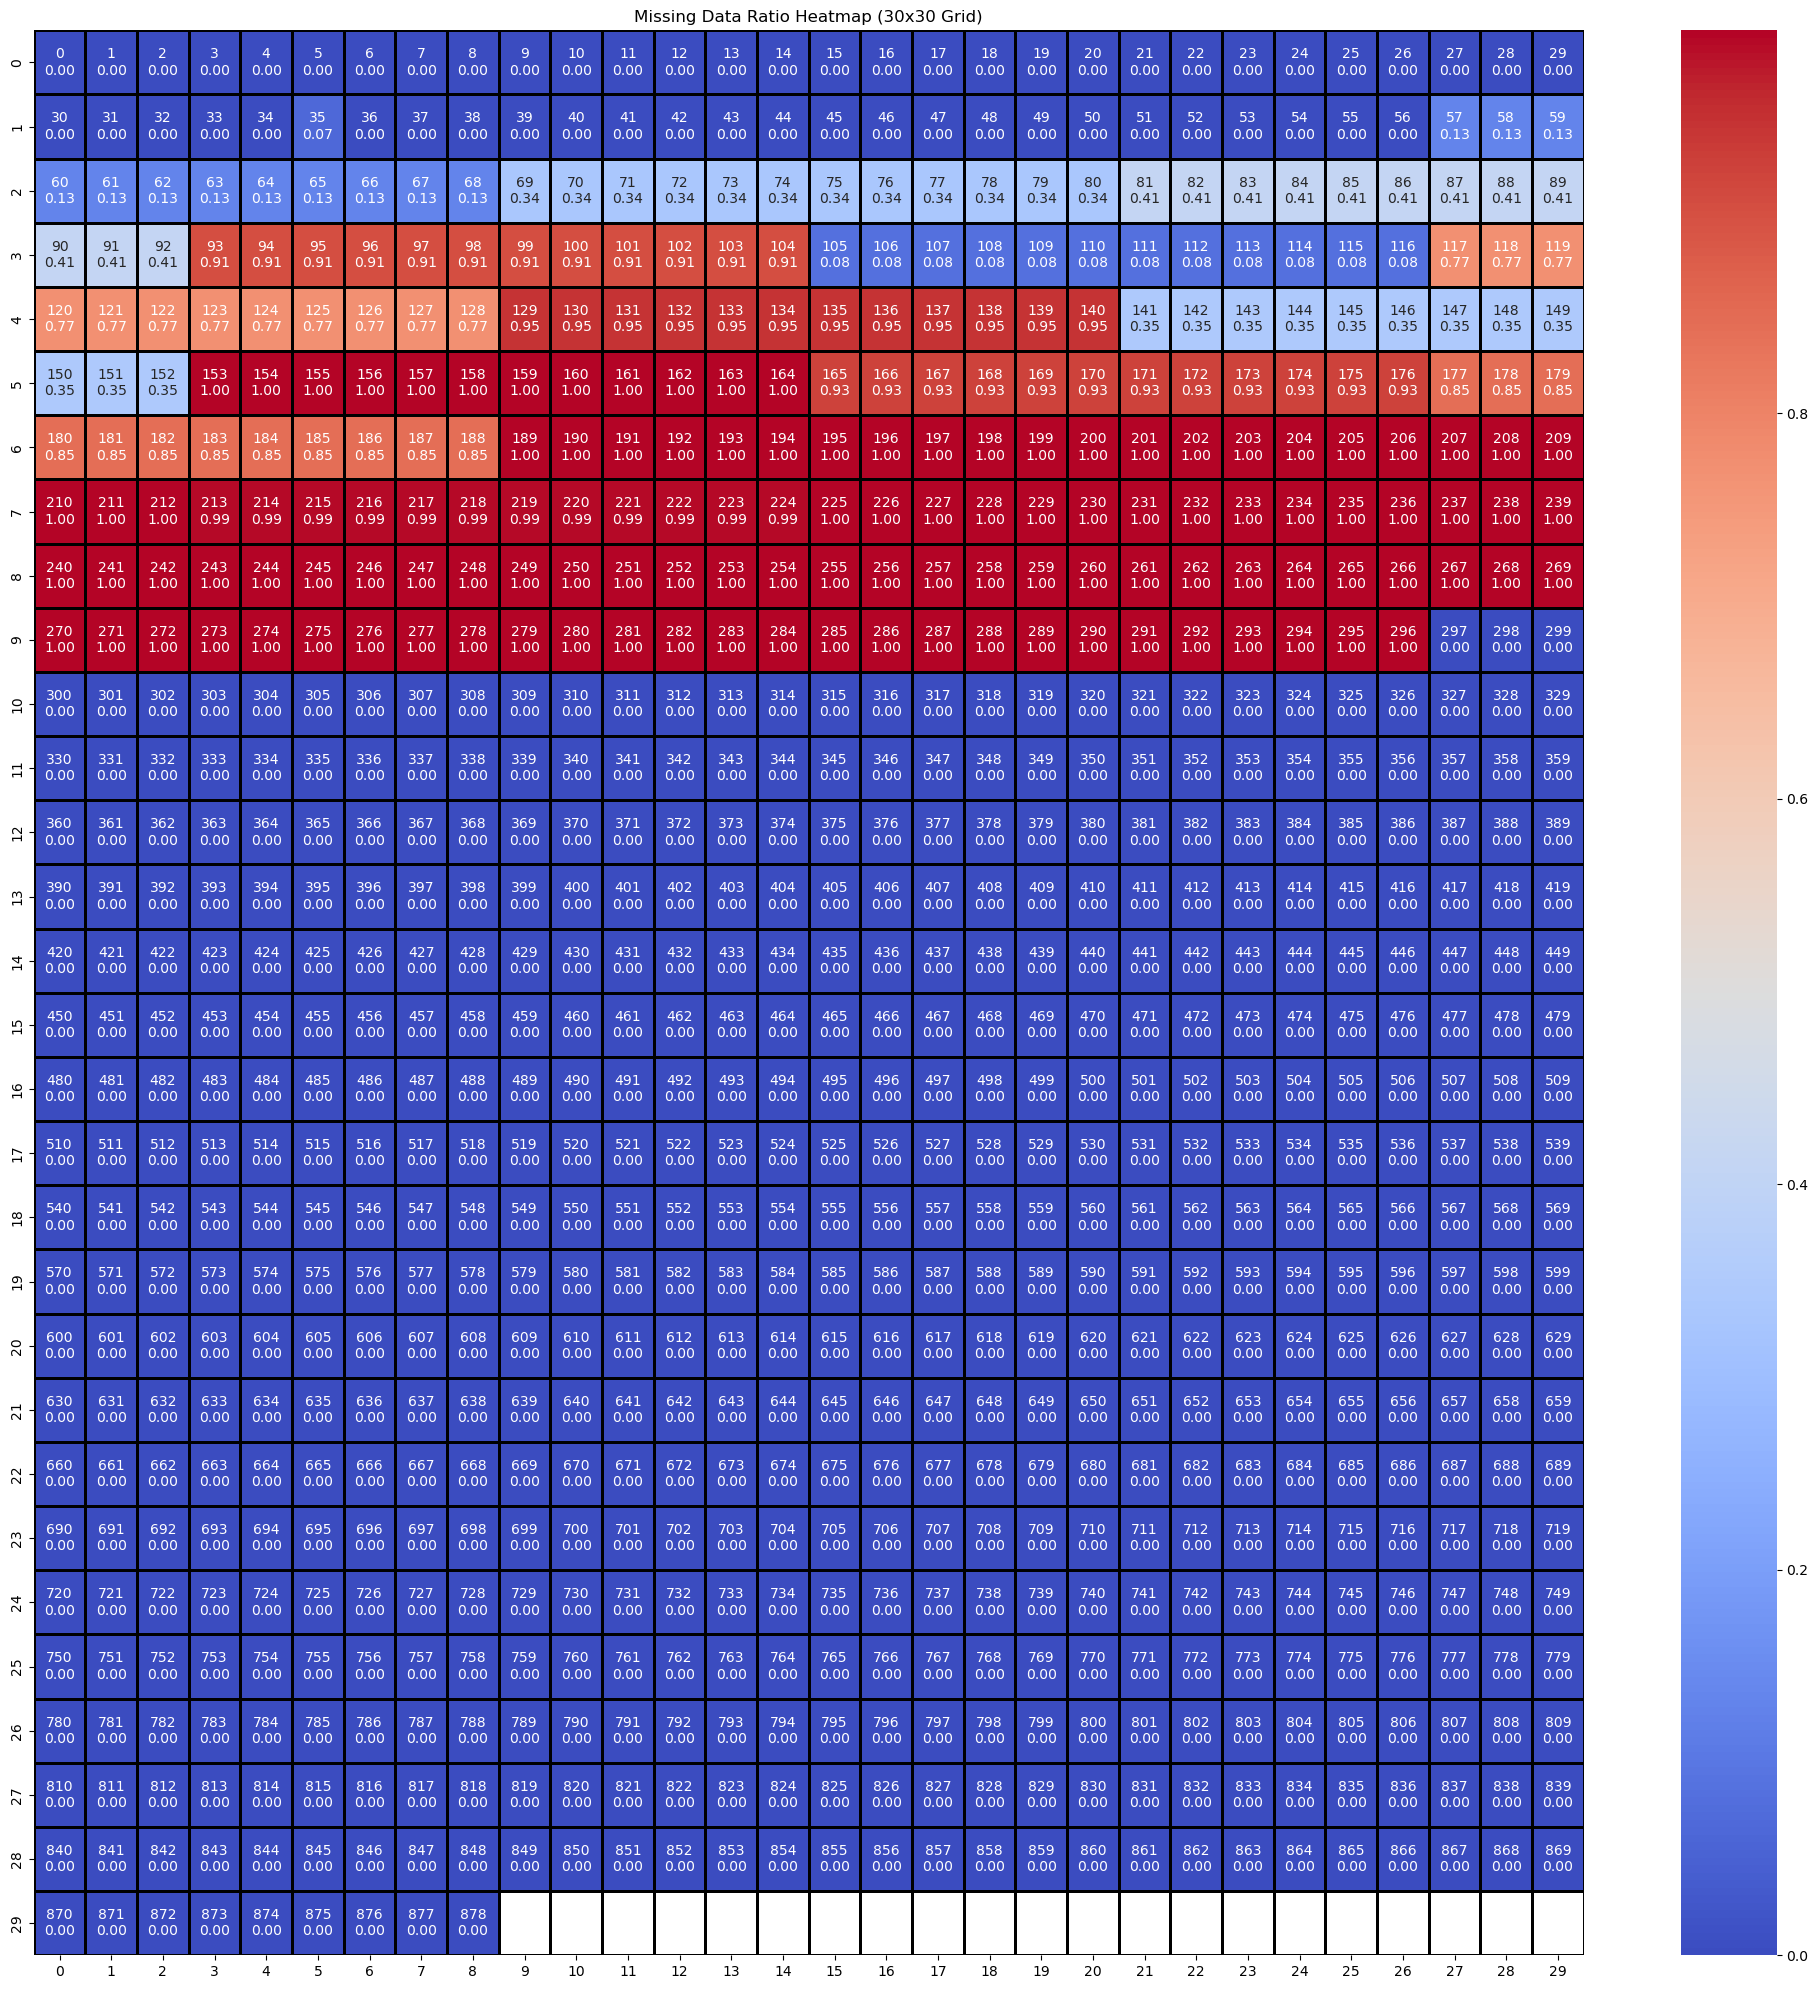

In [138]:
missing_ratio = PrintMissingRatio(none_hex_string_data)
HeatmapMissingRatio(missing_ratio)

In [139]:
# 결측치 데이터 채우기 함수
def FillMissingData(pe_data, mode):
    # 'file_name'과 'label'을 제외한 나머지 데이터만 선택
    return_pe_data = pe_data.drop(columns=['file_name', 'label'])
    
    # 숫자형 데이터만 선택
    numeric_columns = return_pe_data.select_dtypes(include=['number']).columns
    pe_data_numeric = return_pe_data[numeric_columns]

    # 결측치 채우기 방식
    if mode == 0:
        pe_data_filled = pe_data_numeric.fillna(0)
    elif mode == 1:
        pe_data_filled = pe_data_numeric.apply(lambda col: col.fillna(col.max()))
    elif mode == 2:
        pe_data_filled = pe_data_numeric.apply(lambda col: col.fillna(col.min()))
    elif mode == 3:
        pe_data_filled = pe_data_numeric.apply(lambda col: col.fillna(col.mean()))
    elif mode == 4:  
        pe_data_filled = pe_data_numeric.apply(lambda col: col.fillna(col.mode()[0]))
    else:
        print("잘못된 모드 번호입니다.")
        return pe_data 

    return_pe_data[numeric_columns] = pe_data_filled
    return_pe_data = pd.concat([pe_data[['file_name', 'label']], return_pe_data], axis=1)
    
    return return_pe_data

In [140]:
# 0으로 채우기
zero_pe_data = FillMissingData(none_hex_string_data, 0)
zero_pe_data_path = r".\data\missing_ratio\extract_feature(PE_missing_zero).csv"
zero_pe_data.to_csv(zero_pe_data_path)

# 가장 큰 값으로 채우기
max_pe_data = FillMissingData(none_hex_string_data, 1)
max_pe_data_path = r".\data\missing_ratio\extract_feature(PE_missing_max).csv"
max_pe_data.to_csv(max_pe_data_path)

# 가장 작은 값으로 채우기
min_pe_data = FillMissingData(none_hex_string_data, 2)
min_pe_data_path = r".\data\missing_ratio\extract_feature(PE_missing_min).csv"
min_pe_data.to_csv(min_pe_data_path)

# 평균 값으로 채우기
mean_pe_data = FillMissingData(none_hex_string_data, 3)
mean_pe_data_path = r".\data\missing_ratio\extract_feature(PE_missing_mean).csv"
mean_pe_data.to_csv(mean_pe_data_path)

# 가장 많이 등장한 값으로 채우기
appear_pe_data = FillMissingData(none_hex_string_data, 4)
appear_pe_data_path = r".\data\missing_ratio\extract_feature(PE_missing_appear).csv"
appear_pe_data.to_csv(appear_pe_data_path)


In [4]:
# 경로
zero_pe_data_path = r".\data\missing_ratio\extract_feature(PE_missing_zero).csv"
max_pe_data_path = r".\data\missing_ratio\extract_feature(PE_missing_max).csv"
min_pe_data_path = r".\data\missing_ratio\extract_feature(PE_missing_min).csv"
mean_pe_data_path = r".\data\missing_ratio\extract_feature(PE_missing_mean).csv"
appear_pe_data_path = r".\data\missing_ratio\extract_feature(PE_missing_appear).csv"


# 원하는 데이터로 결측치 결정
missing_data = pd.read_csv(zero_pe_data_path)
# missing_data = pd.read_csv(max_pe_data_path)
# missing_data = pd.read_csv(min_pe_data_path)
# missing_data = pd.read_csv(mean_pe_data_path)
# missing_data = pd.read_csv(appear_pe_data_path)

missing_data = missing_data.drop(columns=['Unnamed: 0'])
missing_data

,file_name,label,DOS_HEADER/e_magic,DOS_HEADER/e_cblp,DOS_HEADER/e_cp,DOS_HEADER/e_crlc,DOS_HEADER/e_cparhdr,DOS_HEADER/e_minalloc,DOS_HEADER/e_maxalloc,DOS_HEADER/e_ss,...,byte_entropy_histogram_54,byte_entropy_histogram_55,byte_entropy_histogram_56,byte_entropy_histogram_57,byte_entropy_histogram_58,byte_entropy_histogram_59,byte_entropy_histogram_60,byte_entropy_histogram_61,byte_entropy_histogram_62,byte_entropy_histogram_63
0,1137362895688720987655305141407196041146519468...,0,23117,144,3,0,4,0,65535,0,...,33965,33817,7203,4887,3189,5669,2300,1939,1660,1825
1,2848155905708583992408892664162745979911072662...,1,23117,144,3,0,4,0,65535,0,...,0,0,0,0,0,0,0,0,0,0
2,9220689313678134197264299136406578309685149196...,0,23117,144,3,0,4,0,65535,0,...,15856,33605,0,0,0,0,0,0,0,0
3,1036669274663769240135268653641244320268856070...,0,23117,80,2,0,4,15,65535,0,...,121606,249421,0,0,0,0,0,0,0,0
4,1930422337147264060739149983746607776888460452...,0,23117,144,3,0,4,0,65535,0,...,36231,107965,31087,30321,29759,31268,29651,30198,30093,31335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19082,3875336433269009975205937465453739311477163064...,0,23117,144,3,0,4,0,65535,0,...,2810,6849,1963,1641,817,1850,561,474,447,439
19083,4521114940902016309378371165251362864605015366...,0,23117,144,3,0,4,0,65535,0,...,0,0,7147,4805,3172,5716,2341,1875,1771,1845
19084,3872204124153245263508087032304994807772283549...,1,23117,144,3,0,4,0,65535,0,...,11008,20979,126090,124540,124735,125069,124803,125439,125266,125530
19085,4419239216672438381570631327595244885034058684...,0,23117,144,3,0,4,0,65535,0,...,3411,1393,5942,4967,3779,4666,2975,1836,1521,938


# 상관 관계

관련 없는 일부 데이터 제거 (안해도 상관없음)

In [7]:
# 상관관계가 높은 피처 추출
def get_highly_correlated_features(corr_matrix, threshold=0.8):
    # 상삼각 행렬만 추출하여 중복 제거
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    return to_drop

In [ ]:
# threshold의 값을 변경해 데이터 삭제
threshold = 0.9
correlation_matrix = missing_data.corr().abs()
highly_correlated_features = get_highly_correlated_features(correlation_matrix, threshold)
missing_data = missing_data.drop(columns=highly_correlated_features)


# 엔트로피

1. 엔트로피 계산

2. 엔트로피 히트맵 출력

3. column 제거 (엔트로피 활용)

In [142]:
# 엔트로피 계산 함수
def CalculateEntropy(series):
    value_counts = series.value_counts(normalize=True)
    return -np.sum(value_counts * np.log2(value_counts))

# 필수 데이터 엔트로피 계산
def CalculateEssentialEntropy(pe_data):
    essential_data = pe_data.drop(columns=['file_name', 'label'])
    entropy = essential_data.apply(CalculateEntropy)
    return entropy

In [143]:
# 엔트로피 히트맵 출력
def HeatmapEntropy(entropy):
    # 데이터 개수를 만족하는 최소 값의 N 계산
    n = int(np.ceil(np.sqrt(len(entropy))))

    # 인덱스와 결측치 비율을 list로 저장
    index = []
    for i in range(len(entropy)):
        index.append(i)
    index_padding = index + [np.nan] * (n**2 - len(index))
    entorpy_padding = entropy.values.tolist() + [np.nan] * (n**2 - len(entropy))

    # 인덱스와 결측치 비율을 NxN 형식으로 저장
    index_2d = np.array(index_padding).reshape(n, n)
    entropy_2d = np.array(entorpy_padding).reshape(n, n)

    # 히트맵 표시 데이터 저장
    annot = []
    for i in range(n):
        row = []
        for j in range(n):
            if not np.isnan(entropy_2d[i, j]):
                value = f"{int(index_2d[i, j])}\n{entropy_2d[i, j]:.2f}"
            else:
                value = "" 
            row.append(value)
        annot.append(row)  


    # 히트맵으로 데이터 출력
    plt.figure(figsize=(25, 25))
    sns.heatmap(entropy_2d, cmap='coolwarm', cbar=True, linewidths=1, linecolor='black', annot=annot, fmt="")
    plt.title(f"Entropy Heatmap ({n}x{n} Grid)")
    entropy_heatmap_path = r".\data\entropy\entropy_heatmap.png"
    plt.savefig(entropy_heatmap_path, bbox_inches='tight', dpi=300)
    plt.show()


-----------엔트로피-----------

DOS_HEADER/e_magic          -0.000000
DOS_HEADER/e_cblp            0.660838
DOS_HEADER/e_cp              0.647419
DOS_HEADER/e_crlc            0.025807
DOS_HEADER/e_cparhdr         0.067416
                               ...   
byte_entropy_histogram_59    8.200887
byte_entropy_histogram_60    8.024993
byte_entropy_histogram_61    7.984455
byte_entropy_histogram_62    7.975555
byte_entropy_histogram_63    7.983215
Length: 879, dtype: float64

-----------------------------



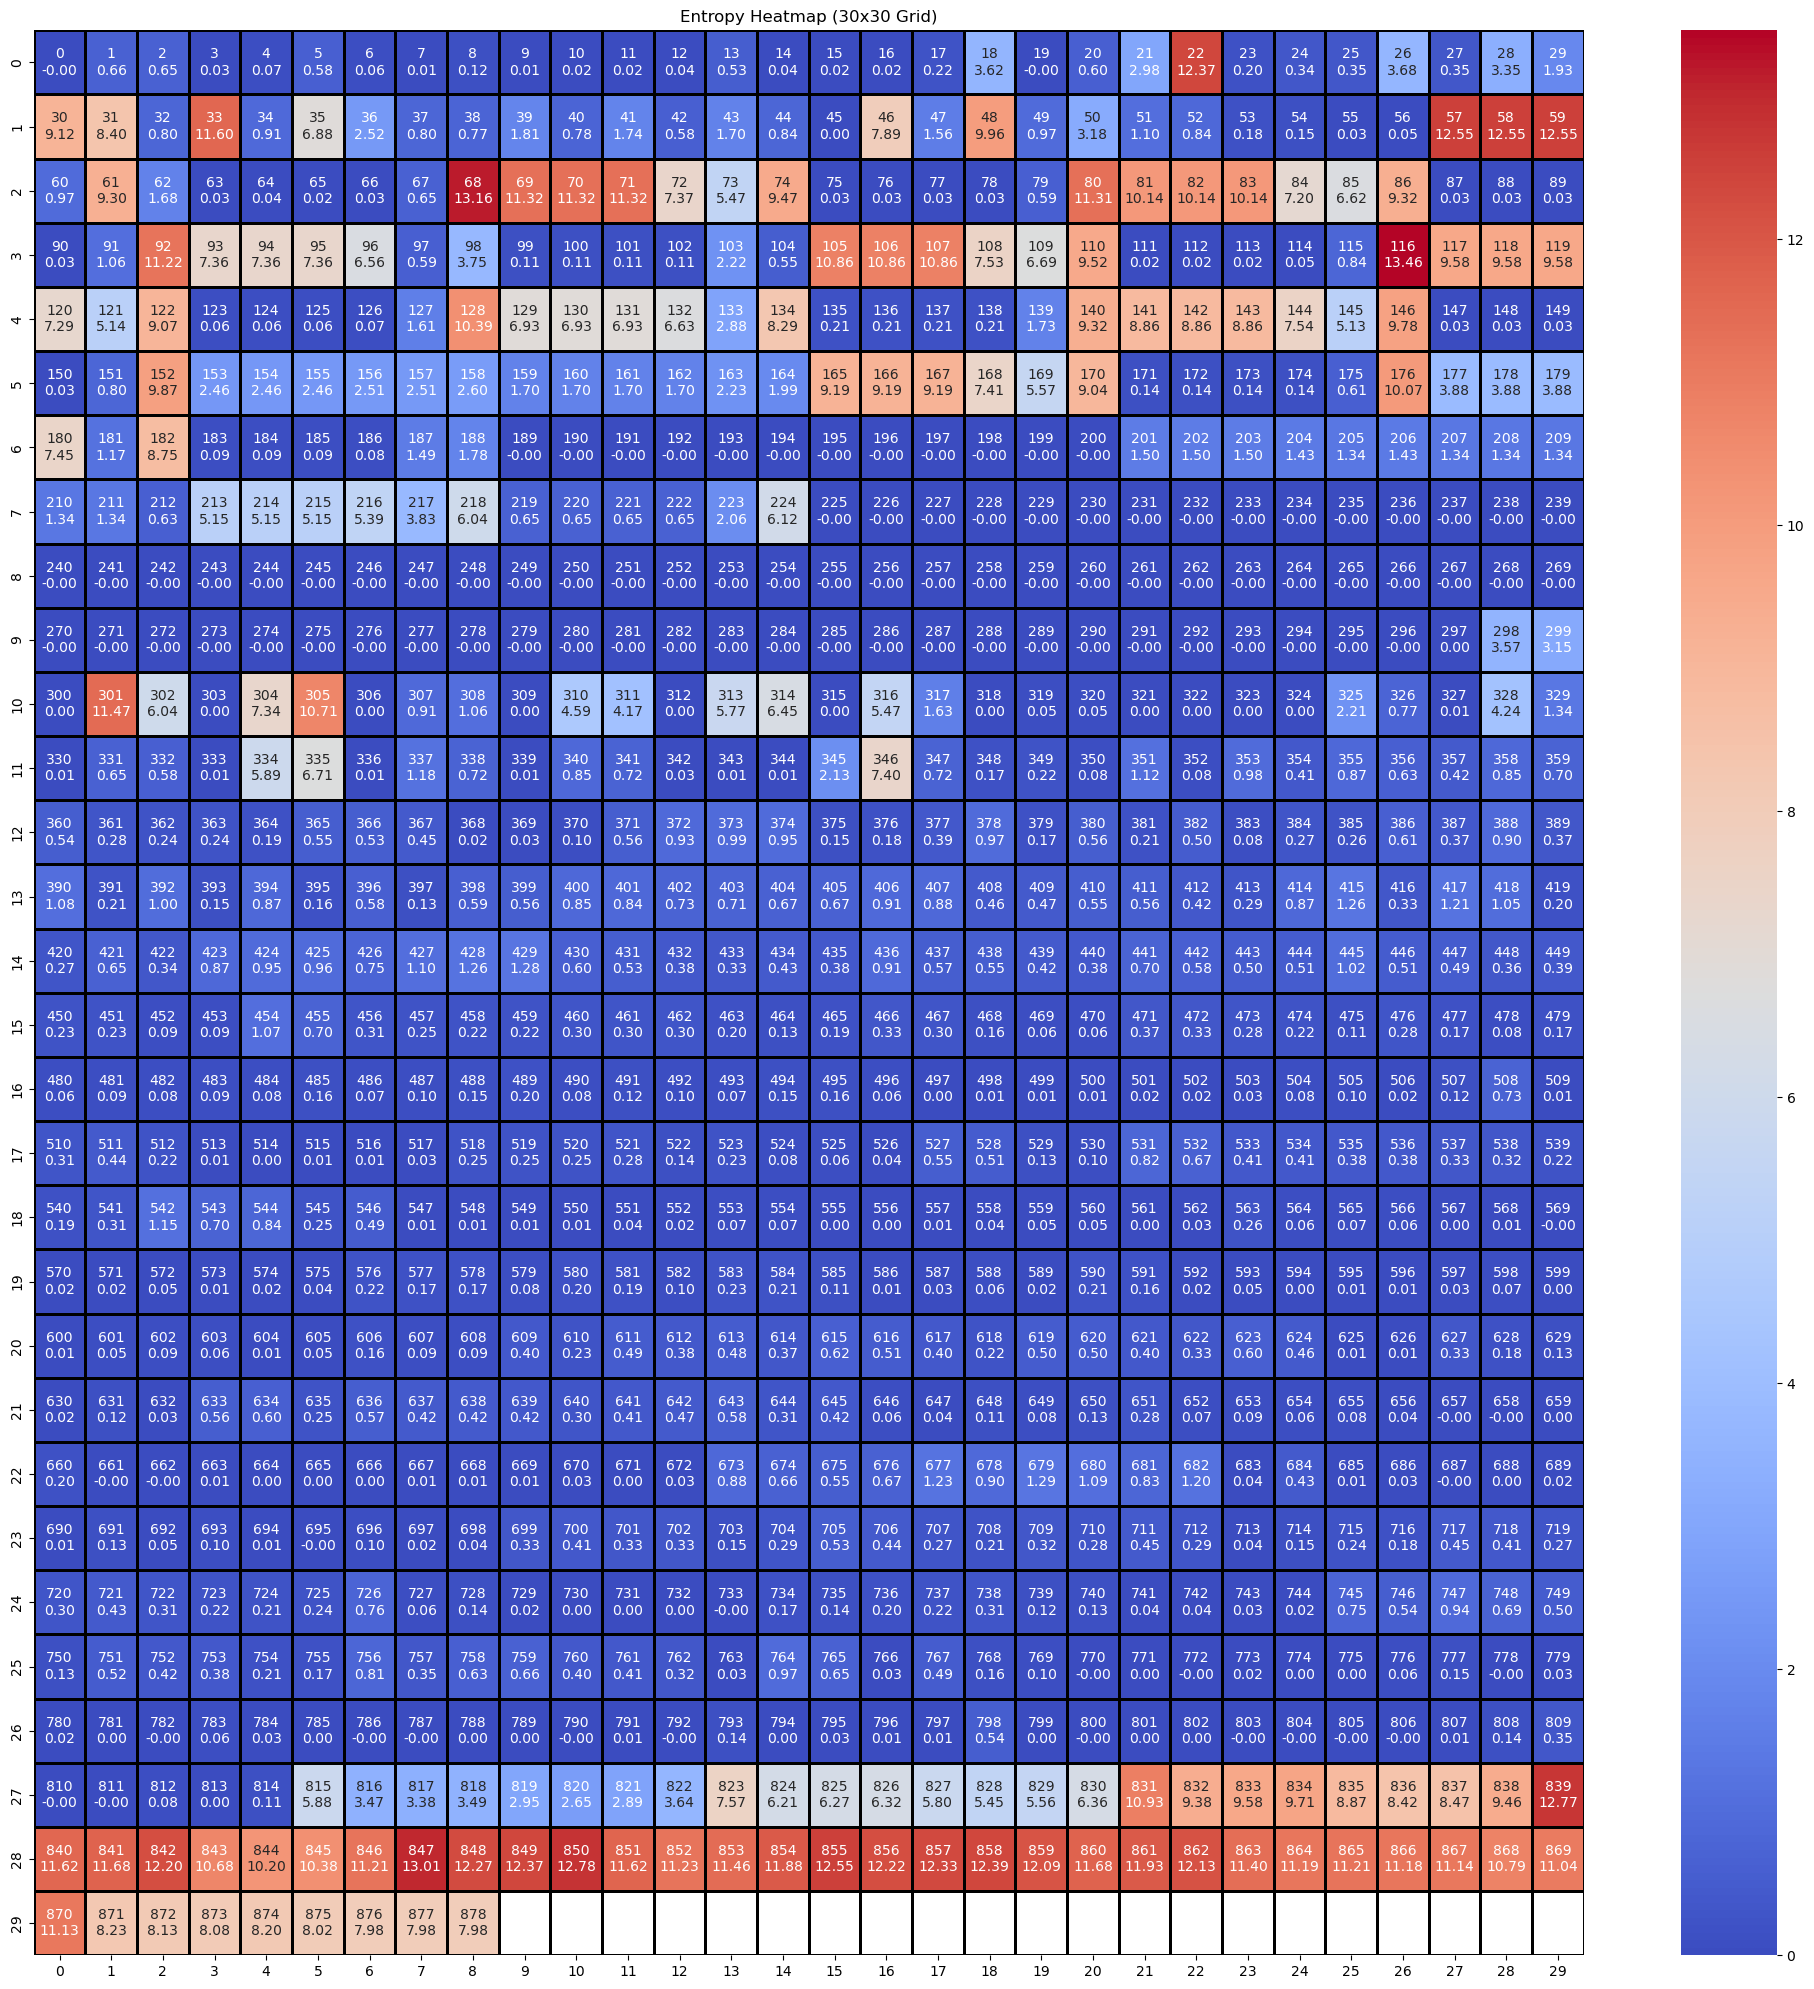

In [144]:
columns_entropy = CalculateEssentialEntropy(pe_data)
print("-----------엔트로피-----------\n")
print(columns_entropy)
print("\n-----------------------------\n")
HeatmapEntropy(columns_entropy)

In [145]:
# 엔트로피를 활용한 column 제거
def RemoveColumnsByEntropy(data, threshold, mode):
    
    entropy = CalculateEssentialEntropy(data)
    
    if mode == 0: # 엔트로피가 낮은 n%의 columns 제거 
        threshold_value = entropy.quantile(threshold/100) # 0~100까지의 숫자 입력
        columns_to_remove = entropy[entropy <= threshold_value].index
    elif mode == 1:
        columns_to_remove = entropy.nsmallest(threshold).index
    elif mode == 2:
        columns_to_remove = entropy[entropy <= threshold].index
    
    # 해당 컬럼들을 제거한 데이터프레임 반환
    df_cleaned = data.drop(columns=columns_to_remove)
    
    return df_cleaned

In [146]:
# 낮은 n% column 제거
entropy_x = 30
entropy_0_pe_data = RemoveColumnsByEntropy(missing_data, entropy_x, 0)
entropy_0_pe_data_path = r".\data\entropy\extract_feature(PE_entropy_0).csv"
entropy_0_pe_data.to_csv(entropy_0_pe_data_path)

# 낮은 n개 column 제거
entropy_n = 2
entropy_1_pe_data = RemoveColumnsByEntropy(pe_data, entropy_n, 1)
entropy_1_pe_data_path = r".\data\entropy\extract_feature(PE_entropy_1).csv"
entropy_1_pe_data.to_csv(entropy_1_pe_data_path)

# 특정 n보다 작은 column 제거
entropy_n = 2
entropy_2_pe_data = RemoveColumnsByEntropy(pe_data, entropy_n, 2)
entropy_2_pe_data_path = r".\data\entropy\extract_feature(PE_entropy_2).csv"
entropy_2_pe_data.to_csv(entropy_2_pe_data_path)

In [147]:
# 경로
entropy_0_pe_data_path = r".\data\entropy\extract_feature(PE_entropy_0).csv"
entropy_1_pe_data_path = r".\data\entropy\extract_feature(PE_entropy_1).csv"
entropy_2_pe_data_path = r".\data\entropy\extract_feature(PE_entropy_2).csv"

# 원하는 데이터로 결측치 결정
entropy_data = pd.read_csv(entropy_0_pe_data_path)
# entropy_data = pd.read_csv(entropy_1_pe_data_path)
# entropy_data = pd.read_csv(entropy_2_pe_data_path)

entropy_data = entropy_data.drop(columns=['Unnamed: 0'])
entropy_data

,file_name,label,DOS_HEADER/e_cblp,DOS_HEADER/e_cp,DOS_HEADER/e_crlc,DOS_HEADER/e_cparhdr,DOS_HEADER/e_minalloc,DOS_HEADER/e_maxalloc,DOS_HEADER/e_sp,DOS_HEADER/e_ip,...,byte_entropy_histogram_54,byte_entropy_histogram_55,byte_entropy_histogram_56,byte_entropy_histogram_57,byte_entropy_histogram_58,byte_entropy_histogram_59,byte_entropy_histogram_60,byte_entropy_histogram_61,byte_entropy_histogram_62,byte_entropy_histogram_63
0,1137362895688720987655305141407196041146519468...,0,144,3,0,4,0,65535,184,0,...,33965,33817,7203,4887,3189,5669,2300,1939,1660,1825
1,2848155905708583992408892664162745979911072662...,1,144,3,0,4,0,65535,184,0,...,0,0,0,0,0,0,0,0,0,0
2,9220689313678134197264299136406578309685149196...,0,144,3,0,4,0,65535,184,0,...,15856,33605,0,0,0,0,0,0,0,0
3,1036669274663769240135268653641244320268856070...,0,80,2,0,4,15,65535,184,0,...,121606,249421,0,0,0,0,0,0,0,0
4,1930422337147264060739149983746607776888460452...,0,144,3,0,4,0,65535,184,0,...,36231,107965,31087,30321,29759,31268,29651,30198,30093,31335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19082,3875336433269009975205937465453739311477163064...,0,144,3,0,4,0,65535,184,0,...,2810,6849,1963,1641,817,1850,561,474,447,439
19083,4521114940902016309378371165251362864605015366...,0,144,3,0,4,0,65535,184,0,...,0,0,7147,4805,3172,5716,2341,1875,1771,1845
19084,3872204124153245263508087032304994807772283549...,1,144,3,0,4,0,65535,184,0,...,11008,20979,126090,124540,124735,125069,124803,125439,125266,125530
19085,4419239216672438381570631327595244885034058684...,0,144,3,0,4,0,65535,184,0,...,3411,1393,5942,4967,3779,4666,2975,1836,1521,938


# 정규화화

1. 정규화 함수

In [148]:
NORMALIZE_VALUE ={
    "0":"Normalizer",
    "1":"MinMaxScaler",
    "2":"MaxAbsScaler"
}

In [149]:
# 정규화 함수
def NormalizeData(data, mode):
    if mode == 0:
        scaler = Normalizer()  # 벡터 크기를 기준으로 정규화
    elif mode == 1:
        scaler = MinMaxScaler()  # 0과 1 사이로 정규화
    elif mode == 2:
        scaler = MaxAbsScaler()  # 최대 절댓값을 기준으로 정규화
    else:
        print("정규화 오류(normalize_data) : 입력값이 잘못되었습니다.")
    
    normalized_data = scaler.fit_transform(data)

    return normalized_data

In [150]:
# file_name, label 제거 후 정규화 진행
def SelectNormalizeMode(data, mode):
    normalize_data = data.drop(columns = ['file_name', 'label'])
    numeric_columns = normalize_data.select_dtypes(include=['number']).columns
    numeric_data = data[numeric_columns]

    # 정규화
    normalize_numeric_data = NormalizeData(numeric_data, mode)
            
    # 최종 데이터 생성
    normalize_data[numeric_columns] = normalize_numeric_data
    normalize_data = pd.concat([data[['file_name', 'label']], normalize_data], axis=1)

    return normalize_data

In [151]:
normalize_0_pe_data = SelectNormalizeMode(entropy_data, 0)
normalize_0_pe_data_path = r".\data\normalize\extract_feature(PE_normalize_0).csv"
normalize_0_pe_data.to_csv(normalize_0_pe_data_path)

normalize_1_pe_data = SelectNormalizeMode(entropy_data, 1)
normalize_1_pe_data_path = r".\data\normalize\extract_feature(PE_normalize_1).csv"
normalize_1_pe_data.to_csv(normalize_1_pe_data_path)

normalize_2_pe_data = SelectNormalizeMode(entropy_data, 2)
normalize_2_pe_data_path = r".\data\normalize\extract_feature(PE_normalize_2).csv"
normalize_2_pe_data.to_csv(normalize_2_pe_data_path)

In [ ]:
# 경로
normalize_0_pe_data_path = r".\data\normalize\extract_feature(PE_normalize_0).csv"
normalize_1_pe_data_path = r".\data\normalize\extract_feature(PE_normalize_1).csv"
normalize_2_pe_data_path = r".\data\normalize\extract_feature(PE_normalize_2).csv"

# 원하는 데이터로 정규화 결정
normalize_data = pd.read_csv(normalize_0_pe_data_path)
# normalize_data = pd.read_csv(normalize_1_pe_data_path)
# normalize_data = pd.read_csv(normalize_2_pe_data_path)

normalize_data = normalize_data.drop(columns=['Unnamed: 0'])
normalize_data

,file_name,label,DOS_HEADER/e_cblp,DOS_HEADER/e_cp,DOS_HEADER/e_crlc,DOS_HEADER/e_cparhdr,DOS_HEADER/e_minalloc,DOS_HEADER/e_maxalloc,DOS_HEADER/e_sp,DOS_HEADER/e_ip,...,byte_entropy_histogram_54,byte_entropy_histogram_55,byte_entropy_histogram_56,byte_entropy_histogram_57,byte_entropy_histogram_58,byte_entropy_histogram_59,byte_entropy_histogram_60,byte_entropy_histogram_61,byte_entropy_histogram_62,byte_entropy_histogram_63
0,1137362895688720987655305141407196041146519468...,0,1.838397e-08,3.829993e-10,0.0,5.106658e-10,0.000000e+00,0.000008,2.349063e-08,0.0,...,4.336191e-06,4.317296e-06,9.195814e-07,6.239059e-07,4.071283e-07,7.237411e-07,2.936328e-07,2.475452e-07,2.119263e-07,2.329913e-07
1,2848155905708583992408892664162745979911072662...,1,5.380989e-08,1.121039e-09,0.0,1.494719e-09,0.000000e+00,0.000024,6.875708e-08,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2,9220689313678134197264299136406578309685149196...,0,1.743151e-08,3.631565e-10,0.0,4.842086e-10,0.000000e+00,0.000008,2.227360e-08,0.0,...,1.919403e-06,4.067958e-06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
3,1036669274663769240135268653641244320268856070...,0,1.153092e-08,2.882729e-10,0.0,5.765459e-10,2.162047e-09,0.000009,2.652111e-08,0.0,...,1.752786e-05,3.595066e-05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
4,1930422337147264060739149983746607776888460452...,0,2.672824e-08,5.568384e-10,0.0,7.424512e-10,0.000000e+00,0.000012,3.415276e-08,0.0,...,6.724937e-06,2.003969e-05,5.770145e-06,5.627966e-06,5.523651e-06,5.803741e-06,5.503605e-06,5.605135e-06,5.585646e-06,5.816177e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19082,3875336433269009975205937465453739311477163064...,0,3.081874e-08,6.420572e-10,0.0,8.560762e-10,0.000000e+00,0.000014,3.937951e-08,0.0,...,6.013936e-07,1.465817e-06,4.201194e-07,3.512053e-07,1.748536e-07,3.959353e-07,1.200647e-07,1.014450e-07,9.566652e-08,9.395437e-08
19083,4521114940902016309378371165251362864605015366...,0,5.352124e-08,1.115026e-09,0.0,1.486701e-09,0.000000e+00,0.000024,6.838826e-08,0.0,...,0.000000e+00,0.000000e+00,2.656363e-06,1.785900e-06,1.178954e-06,2.124496e-06,8.700919e-07,6.968912e-07,6.582370e-07,6.857409e-07
19084,3872204124153245263508087032304994807772283549...,1,3.308675e-08,6.893074e-10,0.0,9.190765e-10,0.000000e+00,0.000015,4.227752e-08,0.0,...,2.529298e-06,4.820326e-06,2.897159e-05,2.861545e-05,2.866025e-05,2.873699e-05,2.867588e-05,2.882201e-05,2.878226e-05,2.884292e-05
19085,4419239216672438381570631327595244885034058684...,0,3.356716e-08,6.993159e-10,0.0,9.324212e-10,0.000000e+00,0.000015,4.289137e-08,0.0,...,7.951222e-07,3.247157e-07,1.385112e-06,1.157834e-06,8.809049e-07,1.087669e-06,6.934882e-07,4.279813e-07,3.545531e-07,2.186528e-07


# 표준화

1. 표준화 함수

In [153]:
STANDARDIZE_VALUE = {
    "0":"StandardScaler",
    "1":"RobustScaler",
    "2":"PowerTransformer"
}

In [154]:
# 표준화
def StandardizeData(data, mode):
    if mode == 0:
        scaler = StandardScaler()  # 평균 0, 표준편차 1로 표준화
    elif mode == 1:
        scaler = RobustScaler()  # 중앙값과 IQR을 기준으로 표준화
    elif mode == 2:
        scaler = PowerTransformer()  # 비정규 분포 데이터를 정규 분포로 변환
    else:
        print("표준화 오류(standardize_data) : 입력값이 잘못되었습니다.")
    
    standardized_data = scaler.fit_transform(data)
    return standardized_data

In [155]:
# file_name, label 제거 후 표준화 진행
def SelectStandardizeMode(data, mode):
    standardize_data = data.drop(columns = ['file_name', 'label'])
    numeric_columns = standardize_data.select_dtypes(include=['number']).columns
    numeric_data = data[numeric_columns]

    # 표준화
    standardize_numeric_data = StandardizeData(numeric_data, mode)

    # 최종 데이터 생성
    standardize_data[numeric_columns] = standardize_numeric_data
    standardize_data = pd.concat([data[['file_name', 'label']], standardize_data], axis=1)
    
    return standardize_data


In [156]:
standardize_0_pe_data = SelectStandardizeMode(normalize_data, 0)
standardize_0_pe_data_path = r".\data\standardize\extract_feature(PE_standardize_0).csv"
standardize_0_pe_data.to_csv(standardize_0_pe_data_path)

standardize_1_pe_data = SelectStandardizeMode(normalize_data, 1)
standardize_1_pe_data_path = r".\data\standardize\extract_feature(PE_standardize_1).csv"
standardize_1_pe_data.to_csv(standardize_1_pe_data_path)

standardize_2_pe_data = SelectStandardizeMode(normalize_data, 2)
standardize_2_pe_data_path = r".\data\standardize\extract_feature(PE_standardize_2).csv"
standardize_2_pe_data.to_csv(standardize_2_pe_data_path)

In [9]:
# 경로
standardize_0_pe_data_path = r".\data\standardize\extract_feature(PE_standardize_0).csv"
standardize_1_pe_data_path = r".\data\standardize\extract_feature(PE_standardize_1).csv"
standardize_2_pe_data_path = r".\data\standardize\extract_feature(PE_standardize_2).csv"

# 원하는 데이터로 표준화 결정
standardize_data = pd.read_csv(standardize_0_pe_data_path)
# standardize_data = pd.read_csv(standardize_1_pe_data_path)
# standardize_data = pd.read_csv(standardize_2_pe_data_path)

standardize_data = standardize_data.drop(columns=['Unnamed: 0'])
standardize_data

,file_name,label,DOS_HEADER/e_cblp,DOS_HEADER/e_cp,DOS_HEADER/e_crlc,DOS_HEADER/e_cparhdr,DOS_HEADER/e_minalloc,DOS_HEADER/e_maxalloc,DOS_HEADER/e_sp,DOS_HEADER/e_ip,...,byte_entropy_histogram_54,byte_entropy_histogram_55,byte_entropy_histogram_56,byte_entropy_histogram_57,byte_entropy_histogram_58,byte_entropy_histogram_59,byte_entropy_histogram_60,byte_entropy_histogram_61,byte_entropy_histogram_62,byte_entropy_histogram_63
0,1137362895688720987655305141407196041146519468...,0,-0.056002,-0.042183,-0.014339,-0.037715,-0.026146,-0.045928,-0.045929,-0.012303,...,-0.025223,-0.026524,-0.092530,-0.104816,-0.107138,-0.101244,-0.109766,-0.108966,-0.109516,-0.107045
1,2848155905708583992408892664162745979911072662...,1,-0.007529,-0.036634,-0.014339,-0.020698,-0.026146,-0.015520,-0.016363,-0.012303,...,-0.047371,-0.035088,-0.110087,-0.118796,-0.116288,-0.116659,-0.116573,-0.114648,-0.114415,-0.112125
2,9220689313678134197264299136406578309685149196...,0,-0.057305,-0.042332,-0.014339,-0.038173,-0.026146,-0.046745,-0.046724,-0.012303,...,-0.037567,-0.027018,-0.110087,-0.118796,-0.116288,-0.116659,-0.116573,-0.114648,-0.114415,-0.112125
3,1036669274663769240135268653641244320268856070...,0,-0.065379,-0.042895,-0.014339,-0.036576,-0.006698,-0.043892,-0.043950,-0.012303,...,0.042157,0.036230,-0.110087,-0.118796,-0.116288,-0.116659,-0.116573,-0.114648,-0.114415,-0.112125
4,1930422337147264060739149983746607776888460452...,0,-0.044585,-0.040876,-0.014339,-0.033707,-0.026146,-0.038766,-0.038965,-0.012303,...,-0.013021,0.004666,0.000079,0.007315,0.007845,0.006956,0.011008,0.014026,0.014703,0.014689
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19082,3875336433269009975205937465453739311477163064...,0,-0.038988,-0.040235,-0.014339,-0.031742,-0.026146,-0.035255,-0.035551,-0.012303,...,-0.044299,-0.032180,-0.102066,-0.110926,-0.112358,-0.108226,-0.113790,-0.112320,-0.112204,-0.110076
19083,4521114940902016309378371165251362864605015366...,0,-0.007924,-0.036679,-0.014339,-0.020836,-0.026146,-0.015768,-0.016604,-0.012303,...,-0.047371,-0.035088,-0.059371,-0.078778,-0.089793,-0.071409,-0.096403,-0.098650,-0.099199,-0.097173
19084,3872204124153245263508087032304994807772283549...,1,-0.035884,-0.039880,-0.014339,-0.030652,-0.026146,-0.033308,-0.033658,-0.012303,...,-0.034452,-0.025526,0.443050,0.522417,0.527794,0.495417,0.548172,0.547004,0.550920,0.516753
19085,4419239216672438381570631327595244885034058684...,0,-0.035227,-0.039805,-0.014339,-0.030422,-0.026146,-0.032895,-0.033257,-0.012303,...,-0.043310,-0.034444,-0.083642,-0.092852,-0.096491,-0.093492,-0.100497,-0.104823,-0.106219,-0.107357


# 딥러닝

1. 데이터 분할

2. 모델 생성

3. 학습

4. f1 score 출력

# 딥러닝

In [10]:
# data = pd.read_csv(r"C:\Users\USER\Desktop\jaejudo\AI\data\standardize\extract_feature(PE_standardize_0).csv")

y = standardize_data['label']
X = standardize_data.drop(columns=['file_name', 'label'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

In [18]:
# 모델 정의
model = Sequential()

model.add(Dense(512, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(128, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(learning_rate=0.0005), loss='binary_crossentropy', metrics=['accuracy'])


In [23]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

model.fit(X_train_scaled, y_train, epochs=1000, batch_size=32, validation_data=(X_val_scaled, y_val), callbacks=[early_stopping])

Epoch 1/1000
382/382 [==============================] - 2s 6ms/step - loss: 0.2188 - accuracy: 0.9059 - val_loss: 3.1188 - val_accuracy: 0.9122
Epoch 2/1000
382/382 [==============================] - 2s 5ms/step - loss: 0.2083 - accuracy: 0.9154 - val_loss: 6.1909 - val_accuracy: 0.9050
Epoch 3/1000
382/382 [==============================] - 2s 5ms/step - loss: 0.1948 - accuracy: 0.9216 - val_loss: 4.7644 - val_accuracy: 0.9109
Epoch 4/1000
382/382 [==============================] - 2s 6ms/step - loss: 0.1871 - accuracy: 0.9221 - val_loss: 5.5400 - val_accuracy: 0.9060
Epoch 5/1000
382/382 [==============================] - 2s 6ms/step - loss: 0.1846 - accuracy: 0.9246 - val_loss: 4.3896 - val_accuracy: 0.9119
Epoch 6/1000
382/382 [==============================] - 2s 5ms/step - loss: 0.1691 - accuracy: 0.9272 - val_loss: 4.2572 - val_accuracy: 0.9119
Epoch 7/1000
382/382 [==============================] - 2s 5ms/step - loss: 0.1709 - accuracy: 0.9327 - val_loss: 2.9390 - val_accuracy:

In [21]:
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f'테스트 데이터에서의 정확도: {accuracy * 100:.2f}%')

120/120 [==============================] - 0s 1ms/step - loss: 0.6659 - accuracy: 0.8397
테스트 데이터에서의 정확도: 83.97%


# 머신 러닝

In [ ]:
# 머신 러닝
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# 데이터 로드
data = pd.read_csv(r"C:\Users\USER\Desktop\jaejudo\AI\data\standardize\extract_feature(PE_standardize_0).csv")

# 특징과 레이블 준비
y = data['label']
X = data.drop(columns=['file_name', 'label'], axis=1)

# 데이터를 훈련 데이터와 테스트 데이터로 분할 (80% 훈련, 20% 테스트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 특징 데이터를 표준화 (StandardScaler 사용)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# RandomForest 모델 정의
rf_model = RandomForestClassifier(n_estimators=100)

# K-Fold Cross Validation 적용 (예: 5-Fold)
cv_scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=4, scoring='accuracy')

# K-Fold Cross Validation의 평균 정확도
print(f'K-Fold Cross Validation 정확도: {np.mean(cv_scores) * 100:.2f}%')

# 모델을 전체 훈련 데이터로 학습
rf_model.fit(X_train_scaled, y_train)

# 테스트 데이터로 예측
y_pred = rf_model.predict(X_test_scaled)

# 정확도 평가
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f'테스트 데이터 정확도: {accuracy * 100:.2f}%')


K-Fold Cross Validation 정확도: 94.89%
테스트 데이터 정확도: 95.68%
